<a href="https://colab.research.google.com/github/Murad1997/yolov8-training/blob/main/Yolov8_training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Step-by-Step Guide to Train Yolov8 on the OpenImageV7 Dataset for the Segmentation Task
* This notebook guides you to download OpenImageV7 dataset available [here](https://storage.googleapis.com/openimages/web/visualizer/index.html?type=segmentation&set=train&c=%2Fm%2F0cnyhnx&r=false).
* We need to install to libraries in order to start, the first is `fiftyone` and the second one is `ultralytics`.
  - `fiftyone` allows to automatically download the dataset for the specified class and specified task (e.g., `Segmentation` or `Detection`, etc.). We can also specify the `max_samples`, we want to download just for the experimentation purposes.
  -  `ultralytics` is the application programming interface (API) provided by the created of the creator of the Yolov8. [Here](https://docs.ultralytics.com/) is the link to the GitHub repo.
* In this notebook, we select `Barrel` class from the OpenImageV7 and perform the `Segmentation`.



In [3]:
!pip install fiftyone --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.

In [4]:
!pip install ultralytics --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 4.5 MB/s eta 0:00:00


In [5]:
import fiftyone as fo
import fiftyone.zoo as foz

from ultralytics import YOLO
import yaml


import numpy as np
import pandas as pd
import os
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2
from glob import glob

import subprocess
import matplotlib.pyplot as plt

Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


## Downloading dataset from OpenImageV7
  * In the cell below, we use the `fiftyone.zoo` to download the dataset for the `Segmentation` task of the `Barrel` class. This class only contains `488` train images and we download all of them.
  * It will store the dataset in the directory `/content`, as Colab provides enough space to directly store here and do the experiments.


  **Note: You have to download the dataset everytime you change the runtime type.**  

In [6]:
dataset = foz.load_zoo_dataset(
              "open-images-v7",
#               splits= ["train", 'validation'],
              split = 'train',
              dataset_dir = "/content",
              label_types=["segmentations"],
              classes = ['Barrel'],
              max_samples = 488,
          )

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/content/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/content/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [8.2s elapsed, 0s remaining, 482.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [8.2s elapsed, 0s remaining, 482.1Mb/s]       


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/content/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/classes-segmentation.txt' to '/content/train/metadata/segmentation_classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpwqehukru/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-annotations-object-segmentation.csv' to '/content/train/labels/segmentations.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-d.zip' to '/content/train/labels/masks/D.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-b.zip' to '/content/train/labels/masks/B.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-1.zip' to '/content/train/labels/masks/1.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-2.zip' to '/content/train/labels/masks/2.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-5.zip' to '/content/train/labels/masks/5.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-4.zip' to '/content/train/labels/masks/4.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-8.zip' to '/content/train/labels/masks/8.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-9.zip' to '/content/train/labels/masks/9.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-7.zip' to '/content/train/labels/masks/7.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-3.zip' to '/content/train/labels/masks/3.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-e.zip' to '/content/train/labels/masks/E.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-0.zip' to '/content/train/labels/masks/0.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-f.zip' to '/content/train/labels/masks/F.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-a.zip' to '/content/train/labels/masks/A.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-c.zip' to '/content/train/labels/masks/C.zip'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/train-masks/train-masks-6.zip' to '/content/train/labels/masks/6.zip'


INFO:fiftyone.utils.openimages:Downloading 488 images


 100% |███████████████████| 488/488 [42.4s elapsed, 0s remaining, 12.8 files/s]      


INFO:eta.core.utils: 100% |███████████████████| 488/488 [42.4s elapsed, 0s remaining, 12.8 files/s]      


Dataset info written to '/content/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |█████████████████| 488/488 [1.3m elapsed, 0s remaining, 5.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 488/488 [1.3m elapsed, 0s remaining, 5.1 samples/s]      


Dataset 'open-images-v7-train-488' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-488' created


In [7]:
img_list = os.listdir('/content/train/data/')
img_list = list(map(lambda x: x.split('.')[0], img_list))
img_id = f'{img_list[2]}.jpg'

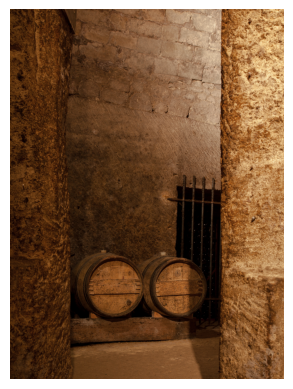

In [8]:
img = cv2.imread(f'/content/train/data/{img_id}')
# As OpenCV loads the image in the BGR format and matplotlib expects
# the RGB format, therefore, we do the following conversion.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.axis('off')
None

* Here we are loading the **classes.csv** file in the metadata folder to get the `LabelName` value of the class `Barrel`.

In [9]:
df_class = pd.read_csv('/content/train/metadata/classes.csv')
barrel_id = df_class[df_class['Tortoise'] == 'Barrel'].values[0][0]
print(f'Barrel id is : {barrel_id}')

Barrel id is : /m/02zn6n


In [10]:
data_addr = '/content/train'
data_addr = Path(data_addr)
img_names = os.listdir(data_addr.joinpath('data'))

* In the cell below we only select the masks that corresponds to the class `Barrel`.

In [12]:
masks_list = []
img_masks = []
for dirname, _, filenames in os.walk('/content/train/labels/masks/'):
  for filename in filenames:
    if filename.split('_')[1] == 'm02zn6n':
      # img_masks.append(filename)
      img_masks.append(os.path.join(dirname, filename))

* In the cell below we prepare the directories to put the data in the way which Yolov8 accepts.

In [15]:
if not os.path.isdir('/content/images/'):
    os.mkdir('/content/images/')
    os.mkdir('/content/images/train/')
    os.mkdir('/content/images/val/')
    print('Done creating the images folders.')

if not os.path.isdir('/content/labels/'):
    os.mkdir('/content/labels/')
    os.mkdir('/content/labels/train/')
    os.mkdir('/content/labels/val/')
    print('Done creating the labels folders.')

Done creating the images folders.
Done creating the labels folders.


In [16]:
def create_and_save_mask(mask, output_dir = None):
    """
      This function is taken from to convert the masks into the Yolov8 format.
        https://github.com/computervisioneng/image-segmentation-yolov8/tree/main

    """

    if output_dir is None:
        print('Please enter the path for storing the mask.')
        return;

    _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    H, W = mask.shape
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # convert the contours to polygons
    polygons = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 200:
            polygon = []
            for point in cnt:
                x, y = point[0]
                polygon.append(x / W)
                polygon.append(y / H)
            polygons.append(polygon)

    # print the polygons
    with open(output_dir, 'w') as f:
        for polygon in polygons:
            for p_, p in enumerate(polygon):
                if p_ == len(polygon) - 1:
                    f.write('{}\n'.format(p))
                elif p_ == 0:
                    f.write('0 {} '.format(p))
                else:
                    f.write('{} '.format(p))

        f.close()

* Let us prepare the dataset for the Yolov8.

In [17]:
for _idx_ in tqdm(range(len(img_names))):
    cur_img_name = img_names[_idx_].split('.')[0]
    _cur_mask = None

    cur_masks_list = list(filter(lambda x: x.split('/')[-1].split('_')[0] == cur_img_name, img_masks ))

    cur_img_arr = cv2.imread(data_addr.joinpath('data', f'{img_names[_idx_]}').as_posix())


    H, W, _ = cur_img_arr.shape

    cur_img_arr = cv2.cvtColor(cur_img_arr, cv2.COLOR_BGR2RGB)

    for idx in range(len(cur_masks_list)):

        if _cur_mask is None:
            # _cur_mask = plt.imread(data_addr.joinpath('labels', 'masks', '0', cur_masks_list[idx] ))
            _cur_mask = plt.imread(cur_masks_list[idx])

        else:
            # _cur_mask += plt.imread(data_addr.joinpath('labels', 'masks', '0', cur_masks_list[idx] ))
            _cur_mask += plt.imread(cur_masks_list[idx])

    if _cur_mask is not None:
        _cur_mask = _cur_mask.astype('uint8')

        _cur_mask[_cur_mask != 0] = 255

        _cur_mask = cv2.resize(_cur_mask, (W, H))



        plt.imsave(f'/content/images/train/{img_names[_idx_]}', cur_img_arr)

        create_and_save_mask(_cur_mask, f'/content/labels/train/{cur_img_name}.txt')

  0%|          | 0/488 [00:00<?, ?it/s]

* In the cell below take `13 %` of the training images as the validation images, and move the validation images to `images/val` directory and corresponding masks into `labels/val` directory.

In [18]:
tr_imgs = os.listdir('/content/images/train/')

val_imgs = tr_imgs[0: int(len(tr_imgs)*0.13)]

tr_imgs = tr_imgs[(int(len(tr_imgs)*0.13)): ]
for _cur in val_imgs:
    cmd = ['mv', f'/content/images/train/{_cur}', f'/content/images/val/{_cur}']
    subprocess.run(cmd)

val_labels = list(map(lambda x: x[0:-4]+'.txt', val_imgs))
for _cur in val_labels:
    cmd = ['mv', f'/content/labels/train/{_cur}', f'/content/labels/val/{_cur}']
    subprocess.run(cmd)

* As the Yolov8 accepts a Yaml file that specifies the information about the dataset. In the cell below we prepare Yaml file by first creating a Python dictionary and then storing that as a Yaml file.

In [19]:
dataset_file = {
    'path': '/content/',
    'train': 'images/train',
    'val': 'images/val',
    'nc' : 1,
    'names':  ['Barrel']
}
dataset_file_addr = 'dataset.yaml'
with open(dataset_file_addr, 'w') as i_file:
    yaml.dump(dataset_file, i_file, default_flow_style=None)

In [20]:
# Set your WANDB_API_KEY here
# os.environ['WANDB_API_KEY'] = # Your WANDB token should be here
os.environ['WANDB_DISABLED'] = 'true'

* The cell below loads the Yolov8 segmentation model and fine-tune for `50 epochs` with an image size of `640`.

**Note: Before running the cell the below, make sure you have turned the GPU runtime on. Moreover, by the chaning the runtime you may have run the whole notebook again from the start.**

In [21]:
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data = dataset_file_addr,
            epochs = 50,
            imgsz = 640)

100%|██████████| 6.73M/6.73M [00:00<00:00, 88.7MB/s]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 54.6MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/labels/train... 425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 425/425 [00:01<00:00, 331.08it/s]

train: New cache created: /content/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/labels/val... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 222.97it/s]

val: New cache created: /content/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.2G     0.9791      2.071      2.296      1.232         36        640: 100%|██████████| 27/27 [00:39<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         63        112      0.767      0.277      0.479      0.303      0.718      0.277      0.488      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.88G      1.022      1.785      1.862      1.237         32        640: 100%|██████████| 27/27 [00:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         63        112      0.286      0.295       0.22       0.12      0.184       0.25      0.105     0.0386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.96G      1.077      1.768      1.832       1.29         32        640: 100%|██████████| 27/27 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all         63        112       0.17      0.205     0.0885     0.0373       0.14      0.232      0.081     0.0247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.89G      1.155      1.853      1.858      1.345         32        640: 100%|██████████| 27/27 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         63        112      0.484      0.368      0.384      0.221      0.377      0.402      0.277      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.82G      1.152      1.826      1.733      1.319         44        640: 100%|██████████| 27/27 [00:14<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         63        112      0.459      0.469       0.38      0.184      0.498      0.464      0.334      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.8G      1.179      1.911      1.788      1.345         29        640: 100%|██████████| 27/27 [00:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         63        112      0.576      0.376      0.474      0.289      0.568      0.402       0.46      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.86G      1.186      1.896      1.697       1.33         43        640: 100%|██████████| 27/27 [00:19<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         63        112      0.468      0.482      0.439      0.269      0.492      0.509       0.45      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.81G      1.136      1.733      1.568      1.302         40        640: 100%|██████████| 27/27 [00:19<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         63        112      0.609      0.501       0.53      0.347        0.6      0.496      0.508       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.83G       1.01      1.545      1.485      1.241         45        640: 100%|██████████| 27/27 [00:19<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         63        112      0.514      0.509      0.488      0.323      0.487      0.482      0.457      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.84G      1.077      1.633      1.519       1.28         27        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all         63        112      0.703      0.473      0.557      0.384      0.655      0.491      0.538      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.91G      1.007      1.554      1.386      1.244         30        640: 100%|██████████| 27/27 [00:18<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all         63        112      0.645      0.429       0.47      0.295      0.631       0.42       0.45      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.83G     0.9985      1.602      1.413      1.242         40        640: 100%|██████████| 27/27 [00:15<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all         63        112      0.499       0.48      0.507      0.351      0.486      0.491      0.497      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.89G     0.9648      1.499      1.361      1.218         43        640: 100%|██████████| 27/27 [00:20<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all         63        112      0.598      0.518      0.519      0.369      0.608      0.527      0.525      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.89G      0.998      1.552      1.329       1.25         61        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         63        112      0.553      0.464      0.491      0.347      0.567      0.456       0.49      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.75G      1.005      1.536      1.364      1.244         38        640: 100%|██████████| 27/27 [00:16<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         63        112       0.63      0.527      0.536       0.38      0.559      0.588      0.545      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      0.953      1.532      1.299      1.205         33        640: 100%|██████████| 27/27 [00:17<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         63        112      0.541      0.607      0.528       0.38      0.517       0.58      0.514      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.85G     0.9679      1.488      1.288      1.227         27        640: 100%|██████████| 27/27 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         63        112      0.728      0.491      0.566        0.4      0.701      0.509      0.573      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.87G     0.9615      1.473      1.281      1.208         27        640: 100%|██████████| 27/27 [00:18<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         63        112      0.635      0.388      0.473       0.33      0.649      0.397      0.484      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.81G     0.8989      1.385      1.201      1.184         33        640: 100%|██████████| 27/27 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all         63        112      0.589      0.643       0.62      0.441      0.573      0.625      0.607      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.89G     0.9059      1.333      1.158      1.185         26        640: 100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

                   all         63        112      0.657      0.565      0.576      0.429      0.649      0.561      0.576      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.81G      0.898      1.325       1.18      1.169         57        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all         63        112      0.636      0.593      0.594      0.452      0.636      0.593      0.592      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.89G     0.8833      1.353       1.12      1.162         34        640: 100%|██████████| 27/27 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         63        112       0.73      0.578      0.653      0.475      0.718      0.569      0.641      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.78G     0.8482      1.358      1.126      1.152         40        640: 100%|██████████| 27/27 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         63        112      0.657      0.514      0.574      0.438      0.656      0.511      0.565      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.97G     0.8619       1.28      1.078      1.154         30        640: 100%|██████████| 27/27 [00:19<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         63        112      0.585      0.634      0.609      0.468      0.576      0.625      0.609      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.77G     0.8172      1.324      1.045      1.131         46        640: 100%|██████████| 27/27 [00:18<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         63        112      0.686       0.58      0.637      0.474      0.686       0.58      0.628      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.82G     0.8207      1.244       1.04      1.117         30        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         63        112      0.656      0.529      0.571      0.431      0.667      0.537      0.585      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.83G     0.8299      1.199      1.038      1.128         37        640: 100%|██████████| 27/27 [00:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all         63        112      0.793      0.581      0.665      0.499      0.781      0.573      0.654      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.95G       0.78      1.177      1.005      1.106         35        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         63        112      0.579      0.652      0.626       0.48      0.714      0.534      0.614      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.81G     0.7603      1.168     0.9615      1.084         40        640: 100%|██████████| 27/27 [00:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         63        112      0.721      0.589      0.674      0.497       0.71       0.58      0.658      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.79G     0.7856      1.176     0.9846      1.092         51        640: 100%|██████████| 27/27 [00:17<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         63        112      0.654      0.592      0.653      0.506      0.682      0.598      0.656      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.77G     0.7694      1.171      0.963      1.094         37        640: 100%|██████████| 27/27 [00:19<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         63        112      0.686      0.624      0.629      0.464       0.68      0.616      0.627      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.85G     0.7638      1.138     0.9249      1.115         35        640: 100%|██████████| 27/27 [00:21<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         63        112      0.764      0.562       0.61      0.466      0.777      0.571      0.618       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.87G     0.7304      1.102     0.9167      1.072         40        640: 100%|██████████| 27/27 [00:17<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         63        112      0.668      0.545      0.594      0.462      0.679      0.554      0.603      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G     0.7683      1.131     0.9236      1.086         50        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         63        112      0.695      0.631      0.648      0.497      0.678      0.607      0.644      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.95G     0.7205      1.063     0.9094      1.048         49        640: 100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         63        112      0.703      0.616      0.664      0.496      0.718      0.592      0.648      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.82G     0.7361      1.087     0.8835      1.072         27        640: 100%|██████████| 27/27 [00:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         63        112      0.688      0.643      0.648      0.502      0.691       0.66      0.647      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.83G     0.7201      1.025     0.8521      1.069         30        640: 100%|██████████| 27/27 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         63        112      0.722      0.545      0.607      0.445      0.722      0.545      0.604      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.9G     0.6988      1.065      0.863      1.058         38        640: 100%|██████████| 27/27 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         63        112      0.693      0.607       0.62      0.464      0.731      0.598      0.623      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.86G     0.6943      1.037     0.8242      1.051         25        640: 100%|██████████| 27/27 [00:18<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all         63        112      0.701      0.625      0.667      0.519      0.719      0.634      0.674      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.79G      0.647     0.9894     0.7806      1.024         36        640: 100%|██████████| 27/27 [00:16<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all         63        112      0.733      0.589      0.646      0.496      0.739      0.598      0.658      0.504


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.14G     0.6027      0.945     0.8367      1.001         22        640: 100%|██████████| 27/27 [00:22<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all         63        112      0.628      0.643      0.625      0.464      0.709      0.598      0.631      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G     0.5933     0.9332     0.7759      1.015          9        640: 100%|██████████| 27/27 [00:20<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all         63        112       0.59      0.655      0.615      0.476      0.593      0.652      0.619      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.84G     0.5744     0.9047     0.6904     0.9878         14        640: 100%|██████████| 27/27 [00:12<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         63        112      0.742      0.538      0.613      0.458      0.771      0.536      0.624      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.67G     0.5537     0.8585     0.6869     0.9827         12        640: 100%|██████████| 27/27 [00:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         63        112      0.721       0.67      0.654      0.495      0.682      0.671      0.652      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.71G     0.5482     0.8349      0.668     0.9781         17        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         63        112      0.719      0.607      0.636      0.502       0.73      0.616      0.657      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.74G     0.5364     0.8117     0.6241     0.9823         28        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all         63        112      0.741      0.613      0.655      0.512      0.717      0.625       0.66      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.71G      0.524     0.7762     0.5839     0.9755         13        640: 100%|██████████| 27/27 [00:12<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all         63        112      0.721      0.622      0.655      0.512      0.665      0.688      0.657      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.78G     0.5075     0.7991     0.5656     0.9599         17        640: 100%|██████████| 27/27 [00:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         63        112      0.614      0.653      0.625      0.479      0.658      0.625      0.628      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G     0.5067     0.7699     0.5691     0.9498         14        640: 100%|██████████| 27/27 [00:18<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         63        112      0.669       0.67      0.652      0.507      0.669       0.67      0.657      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.84G     0.4789     0.7628     0.5519     0.9436         11        640: 100%|██████████| 27/27 [00:15<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         63        112      0.763      0.598      0.657      0.514      0.776      0.589      0.662      0.516



50 epochs completed in 0.312 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


                   all         63        112        0.7      0.626      0.667       0.52      0.711      0.634      0.675      0.527
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0992068550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [25]:
def predict_mask(image_path):
    img = cv2.imread(image_path)
    H, W, _ = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img)
    masks = None
    for result in results:
        if result.masks is not None:
            for j, mask in enumerate(result.masks.data):

                mask = mask.detach().cpu().numpy() * 255

                mask = cv2.resize(mask, (W, H))
                if masks is None:
                    masks = mask
                else:
                    masks += mask

    if masks is None:
        masks = np.zeros((H, W)).astype('uint8')
    masks = masks.astype('uint8')
    return img, masks

* Now let us load the last checkpoint of our trained Yolov8 model. The checkpoints will be stored in the directory `/content/runs/segment/train/weights/`.

In [23]:
model = YOLO('/content/runs/segment/train/weights/last.pt')

In [24]:
val_imgs_list = os.listdir('/content/images/val/')

In [29]:
def overlay_mask(mask,
                 img,
                 alpha = 0.6,
                 color = (255, 0, 0)
                 ):
  assert img.shape == mask.shape
  cur_mask = mask.copy()
  yy, xx, _ = np.where(cur_mask > 0)
  cur_mask[yy, xx, :] = (255, 0, 0)
  img_test_combined_mask = cv2.addWeighted(img, alpha, cur_mask, 1 - alpha, 0.0)

  return img_test_combined_mask
def get_the_masked_object(mask_,
                          img_):
  assert mask_.shape == img_.shape
  img_r = cv2.bitwise_and(img_, mask_)
  return img_r

In [35]:
# img_test_addr = f'/content/train/data/{img_names[15]}'
img_test_addr = f'/content/images/val/{val_imgs_list[2]}'
img_test, mask = predict_mask(img_test_addr)
mask = np.repeat(mask[:, :, np.newaxis], 3, -1)


0: 640x480 1 Barrel, 40.9ms
Speed: 5.1ms preprocess, 40.9ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


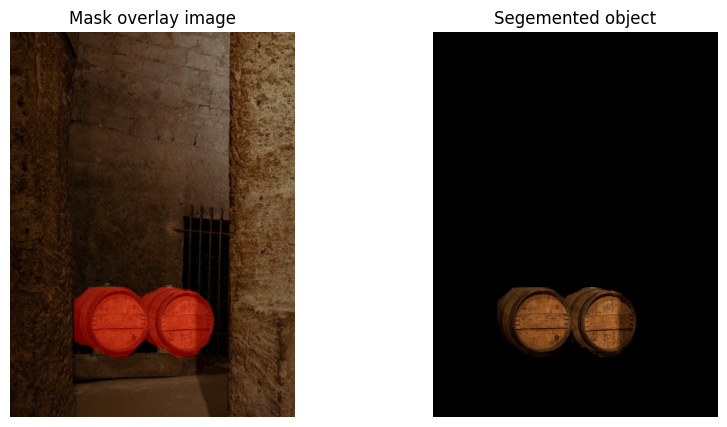

In [37]:
overlay_img = overlay_mask(mask, img_test)
masked_img = get_the_masked_object(mask, img_test)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
ax = axes[0]
ax.imshow(overlay_img)
ax.axis('off')
ax.set_title('Mask overlay image')

ax = axes[1]
ax.imshow(masked_img)
ax.axis('off')
ax.set_title('Segemented object')
None